# Breast Cancer Classification using Machine Learning
In this tutorial, we will create a model to predict whether a patient will have a positive breast cancer prognosis based on several tumor features.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Data Overview and Visualization

In [66]:
df.shape

(569, 6)

In [67]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [69]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


<Figure size 700x700 with 0 Axes>

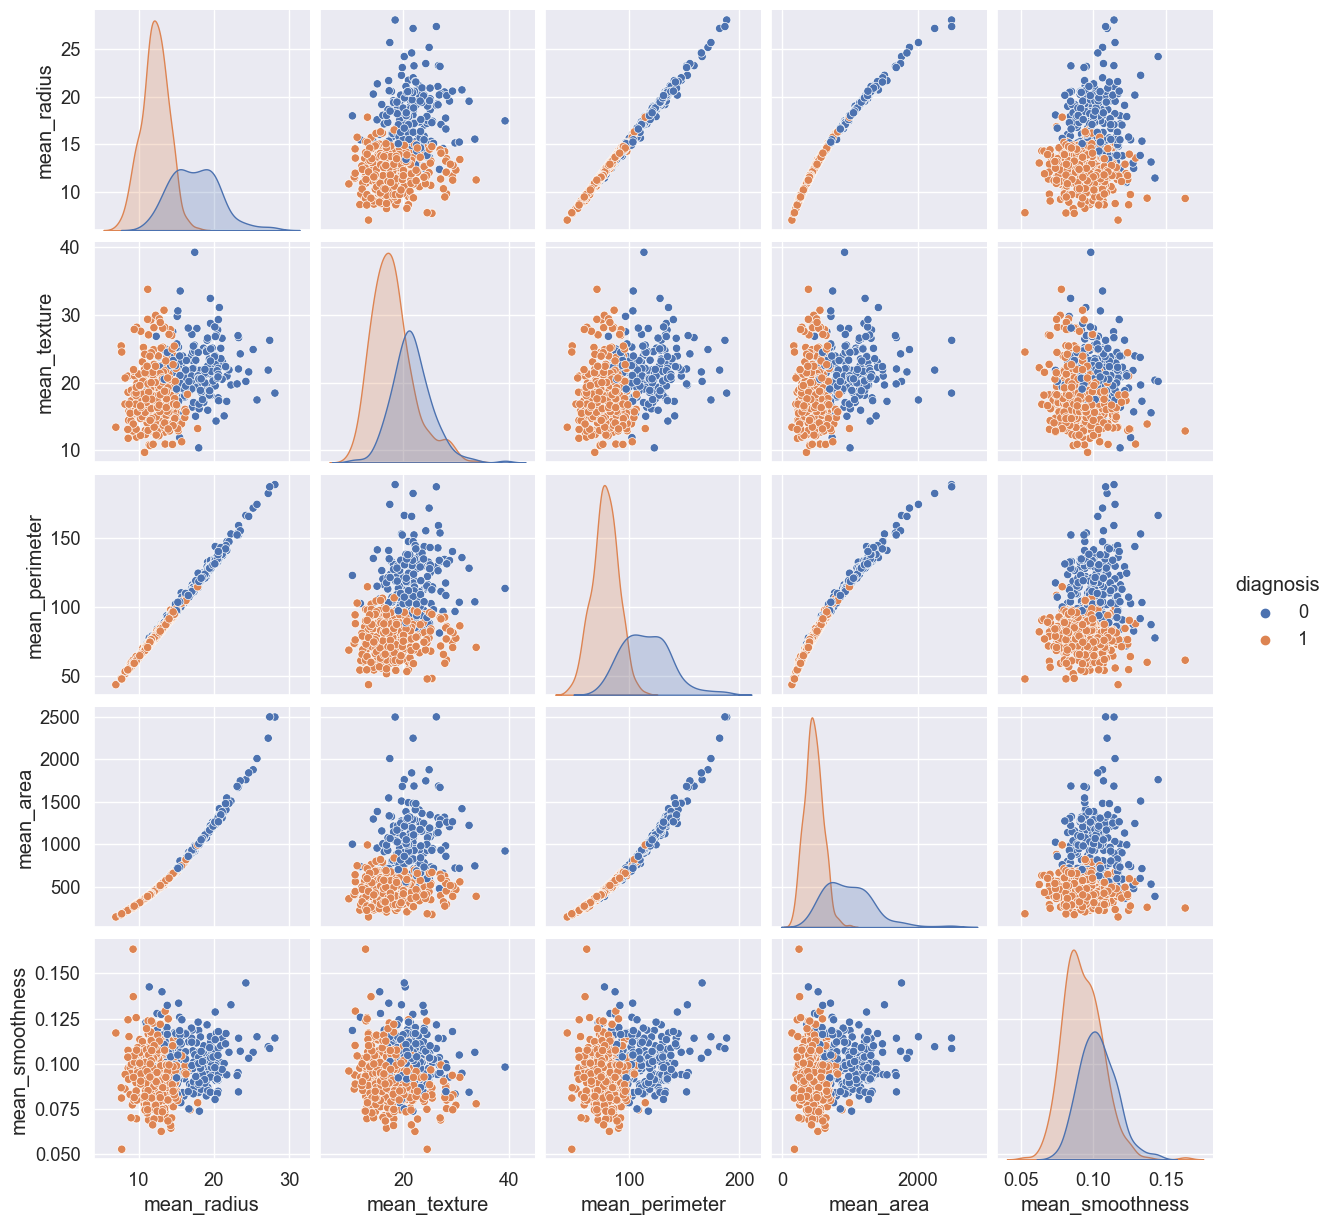

<Figure size 700x700 with 0 Axes>

In [70]:
sns.pairplot(df, hue = 'diagnosis')
plt.figure(figsize=(7,7))

<Axes: >

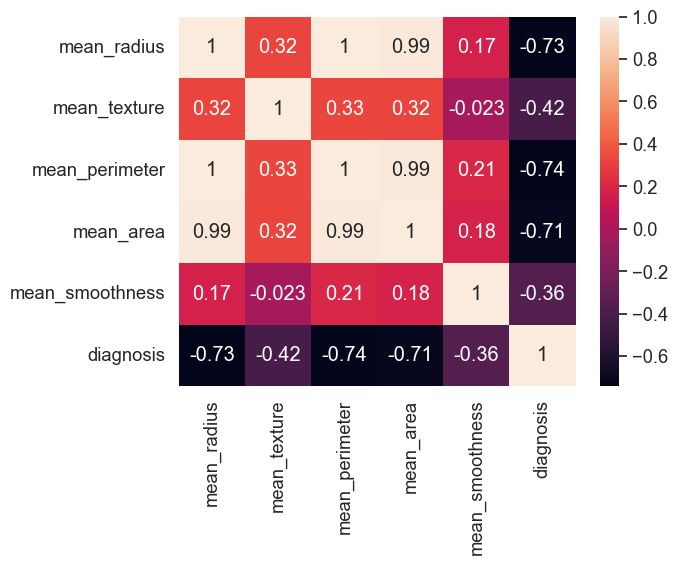

In [71]:
sns.heatmap(df.corr(), annot=True)

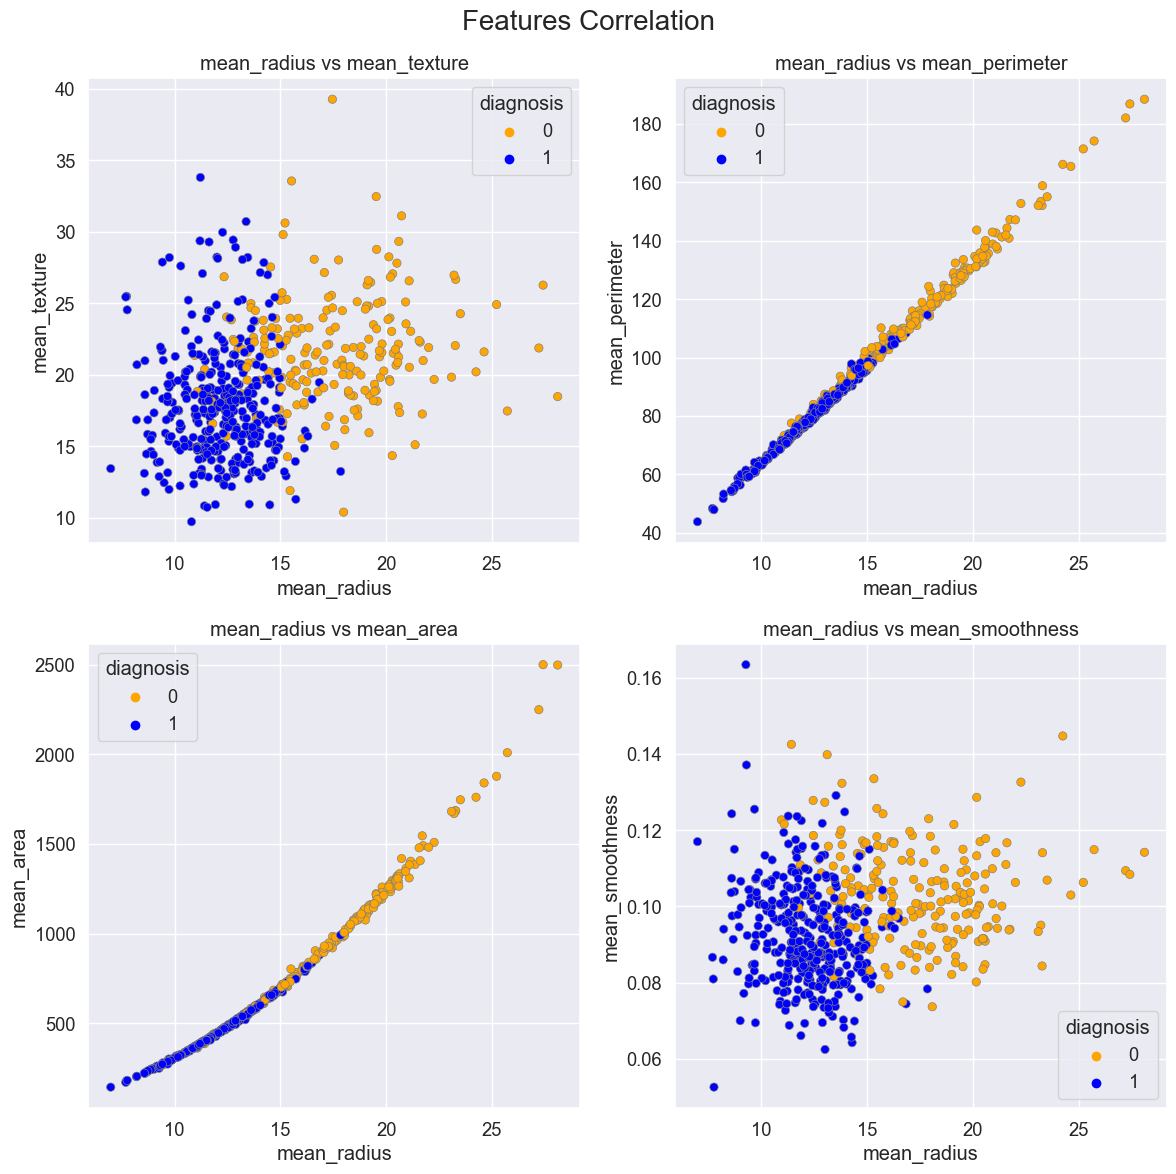

In [72]:
def create_scatterplot(x, y, title, ax_param):
    palette = {0: 'orange', 1: 'blue'}
    edgecolor = 'grey'
    ax = sns.scatterplot(x=x, y=y, hue="diagnosis", data=df, palette=palette, edgecolor=edgecolor, ax=ax_param)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()  # ravel() function is used to flatten a multidimensional array or matrix.

features = ['mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
titles = ['mean_radius vs mean_texture', 'mean_radius vs mean_perimeter', 'mean_radius vs mean_area', 'mean_radius vs mean_smoothness']

for i in range(4):
    create_scatterplot(df['mean_radius'], df[features[i]], titles[i], ax_param=axes[i])

fig.suptitle('Features Correlation', fontsize=20)
plt.tight_layout()
plt.show()

**Remember that 0 means benign, and 1 means malignant**

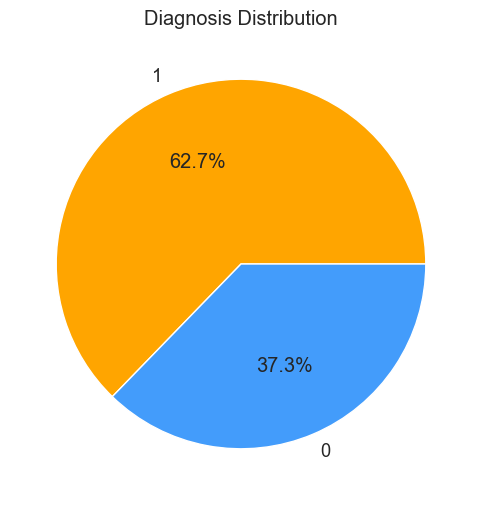

In [73]:
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', colors=['orange', '#439cfb'])

plt.title('Diagnosis Distribution')

plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'mean_perimeter'),
  Text(1, 0, 'mean_radius'),
  Text(2, 0, 'mean_area'),
  Text(3, 0, 'mean_texture'),
  Text(4, 0, 'mean_smoothness')])

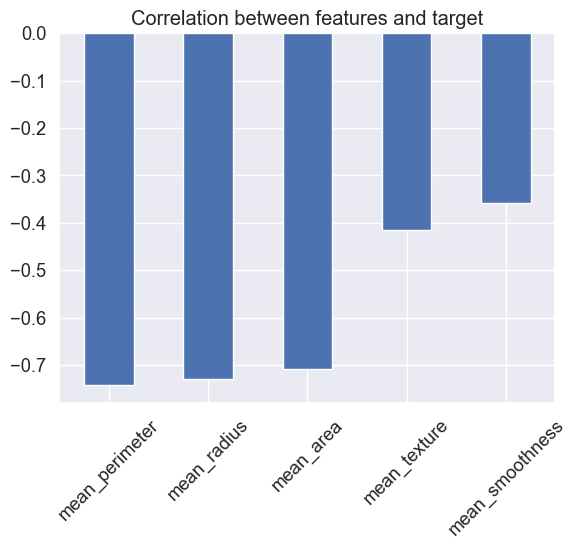

In [74]:
df.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Correlation between features and target')
plt.xticks(rotation=45)

## Splitting The Data Set Into A Training And A Test Set

In [75]:
X = df.drop(columns='diagnosis').values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=101)

model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy of the model: {accuracy: .2f} %')

Accuracy of the model:  88.81 %


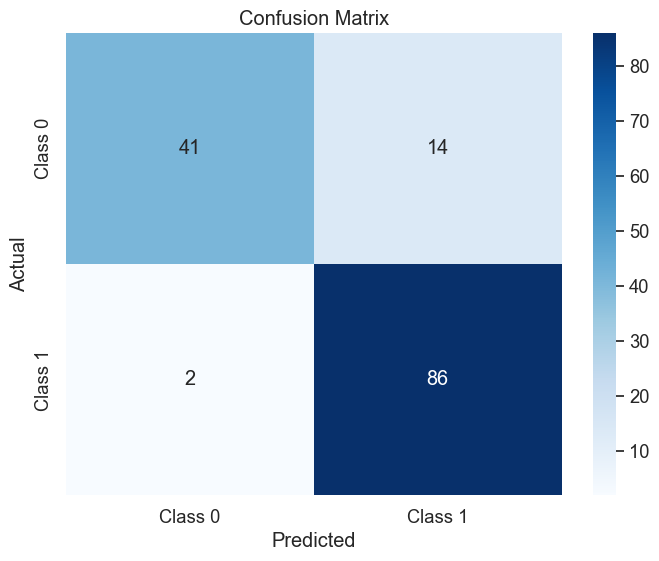

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        43
           1       0.98      0.86      0.91       100

    accuracy                           0.89       143
   macro avg       0.86      0.91      0.88       143
weighted avg       0.91      0.89      0.89       143



In [76]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

print(classification_report(y_pred, y_test))

- Precision is part of the relevant results.
- Recall is a portion of all relevant results that have been categorized correctly.
- score1-F is the harmonic mean between Precision and Recall that ranges from 0 (bad) to 1 (perfect).).

## Feature Scaling
What can we do to improve our model? 

We can scale our features, as feature scaling will help us to see all variables of the same scale, this way we will put all values in the range 0-1.

Please note that I tried to scale the features using MinMaxScaler, StandardScaler, and Normalizer. MinMaxScaler and StandardScaler enhanced the model and showed the same accuracy, but Normalizer was very bad and dropped the model accuracy to 77%. So I used MinMaxScaler.

In [77]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scale = SVC().fit(X_train_scaled, y_train)

y_pred_scaled = model_scale.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)*100
print(f'Accuracy of the model after scaling the features: {accuracy_scaled: .2f} %')

Accuracy of the model after scaling the features:  92.31 %


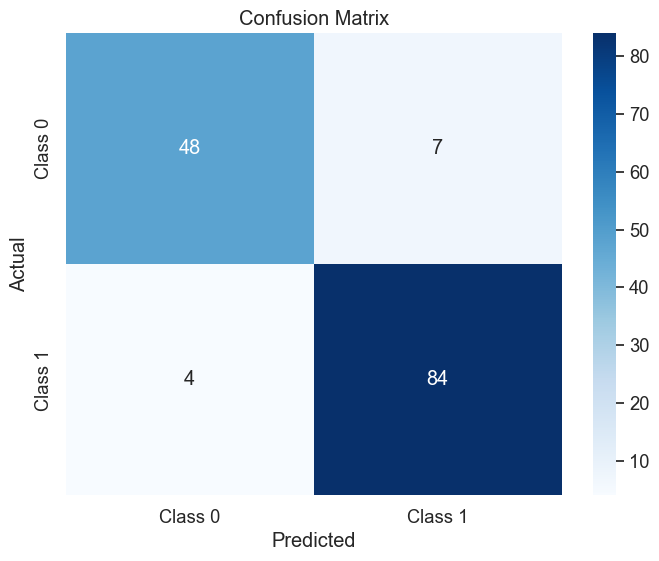

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        52
           1       0.95      0.92      0.94        91

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [78]:
cm = confusion_matrix(y_test, y_pred_scaled)

class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

print(classification_report(y_pred_scaled, y_test))

Optimize SVC parameters:

Parameter C: It controls the cost of misclassifying the training data.

Smaller C: lower variance but higher bias (soft margin) and lower cost of misclassification (lower penalty).
• Bigger C: lower bias, higher variance (hard margin), and increased cost of misclassification (tougher).

Na either:

• Smaller gamma: large conlong-rangeg range, and more general resolution.
• Greater gamma: Higher contrast, lower bias, closer reach, and closer data points carry more weight.

So, let's find the optimal parameters for our model using a search grid:

In [79]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, verbose = 4)
grid.fit(X_train_scaled,y_train)

y_pred_grid = grid.predict(X_test_scaled)

accuracy_grid = accuracy_score(y_test, y_pred_grid)*100
print(f'Accuracy of the model after scaling the data and optimize SVC parameters: {accuracy_grid: .2f} %')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [80]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [81]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

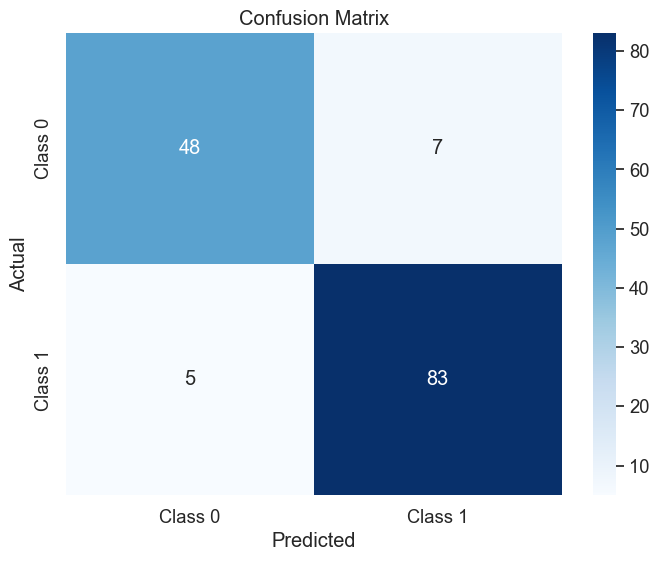

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        55
           1       0.92      0.94      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [82]:
cmG = confusion_matrix(y_test,y_pred_grid)

class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(cmG, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

print(classification_report(y_test,y_pred_grid))

As you can see in this case, the improvement of the last model did not result in the accuracy ratio. However, we succeeded in minimizing type II error.